# <font color=red>밑바닥부터 시작하는 딥러닝 1 - 한빛미디어, 사이토 고키</font>

### Contents (Chapter)

1. 헬로 파이썬 - 파이썬 기초 문법 소개, numpy, matplotlib
2. 퍼셉트론 - AND, NAND, OR 게이트
3. 신경망 - 활성화 함수, 다차원 배열 계산, 출력층 설계, MNIST
4. **`신경망 학습 - 손실 함수, 경사 하강법`**
5. 오차역전파법 - 역전파, 활성화 함수 구현
6. 학습 관련 기술들 - 매개변수 갱신, 배치 정규화, 하이퍼파라미터 값 찾기
7. 합성곱 신경망 (CNN) - 합성곱 계층, 풀링 계층, CNN 구현
8. 딥러닝 - 초기 역사, 딥러닝 활용
9. Appendix - Softmax with loss 계층의 계산 그래프

### 참고 자료

- [책 소개 링크](http://www.yes24.com/Product/Goods/34970929)
- [책 깃헙 링크](https://github.com/WegraLee/deep-learning-from-scratch)

---

## <font color=orange>Chapter 4. 신경망학습</font>

### 4.1 데이터에서 학습한다!

- 신경망의 특징은 데이터를 보고, 학습 할 수 있다는 점
- **학습**이란, 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 학습의 목표는 **손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것**

#### 4.1.1 데이터 주도 학습

- **기계학습**은 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것
- 따라서 기계학습의 중심에는 **데이터**가 존재한다고 할 수 있음
- 기계학습에서는 `사람의 개입을 최소화`하면서 수집한 데이터로 패턴을 찾으려 시도
- MNIST 모델에서 숫자를 인식하는 알고리즘이 동작하기 위해서,
    - 이미지에서 특징 (Feature)을 추출하여 그 특징의 패턴을 기계학습 기술로 학습
    - **특징**은 입력 데이터에서 본질적인 데이터를 정확히 추출할 수 있도록 설계된 변환기
    - 이미지의 특징은 일반적으로 '벡터'로 변환하여 학습
- 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 **기계**가 한다고 할 수 있음
- 사람이 직접 설계하는 것에 비해서 부담은 적지만, 이미지를 벡터로 변환하는 등의 과정은 사람이 해야 함
- 문제에 적합한 특징을 설계하지 (전처리) 못한다면, 좋은 결과를 획득하기도 어렵다고 할 수 있음
- 딥러닝을 입력부터 출력까지 사람의 개입 없이 동작하여 **종단간 기계학습 (end-to-end machine learning)**이라고도 함

#### 4.1.2 훈련 데이터와 시험 데이터

- 기계학습 문제는 **훈련 데이터 (Training data)와 시험 데이터 (Test data)**로 나눠 학습과 실험을 수행
- 훈련 데이터를 통해서 학습하면서 최적의 매개변수를 찾음
- 그 후에 시험 데이터를 사용하여 앞서 훈련한 모델의 성과를 평가
- 결국 모델링의 궁극적인 목적은 범용적으로 사용할 수 있는 **일반화된 모델**이므로, 훈련 데이터와 시험 데이터로 구분
- 이를 위해서 한번도 보지 못했던 훈련에 포함되지 않은 데이터로 성능을 측정
- 한 데이터셋에만 지나치게 최적화 된 상태를 **오버피팅 (Overfitting)**이라고 함

### 4.2 손실 함수

- 신경망 학습에서는 현재의 상태를 `하나의 지표`로 표현
- 그 지표를 가장 좋게 만들어주는 가중치 매개변수 값을 찾는 것이 목적
- 신경망 학습에서 사용하는 지표는 **손실 함수 (Loss function)**이라고 하는데, 일반적으로 `오차제곱합과 교차 엔트로피 오차`를 사용
    - 손실 함수는 신경망의 성능의 나쁨을 나타내는 지표
    - 즉, 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하는지의 성능을 담고 있음
    - 따라서 손실 함수의 값이 클수록 좋지 않는 성능을 갖고 있다고 할 수 있음
    
#### 4.2.1 오차제곱합 (Sum of Square for Error, SSE)

<br/>

$$
E = \frac{1}{2}{\sum_{k} (y_k - t_k)^2}
$$

<br/>

- 가장 많이 쓰이는 손실 함수는 **오차제곱합**이고, 수식은 위와 같음
- $y_k$는 신경망의 출력 (신경망이 출력한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타냄
- 즉, 오차제곱합은 각 원소의 출력과 정답 레이블의 차를 제곱한 후에 그 총합을 구하는 것
- 파이썬 코드로 오차제곱합을 구현하면, 아래와 같음을 알 수 있음
    - MNIST에서 정답이 '2'라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
    - 출력 결과가 맞을 때, 손실 함수 값이 0.0975로 작게 나오는 것을 확인할 수 있음
    - 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 0.5975로 크게 나오는 것을 확인할 수 있음
    - 즉, `손실 함수의 값이 작을수록 정답에 수렴한다`고 할 수 있음

In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t)) # 0.09750000000000003

# 예2: '7'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t)) # 0.5975

0.5975

#### 4.2.2 교차 엔트로피 오차 (Cross Entropy Error, CEE)

<br/>

$$
E = -{\sum_{k} t_klog_ey_k}
$$

<br/>

- 위 수식은 교차 엔트로피 오차의 수식
- log는 밑이 e인 자연로그, $y_k$는 신경망의 출력, $t_k$는 정답 레이블이면서 정답 인덱스만 1 (원-핫 인코딩)
- 따라서 실질적으로 정답일 때 추정의 자연로그를 계산하는 식 (다른 경우에는 모두 0이기 때문)
- 즉, `교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 결정`
- 파이썬 코드로 교차 엔트로피 오차를 구현하면, 아래와 같음을 알 수 있음
    - MNIST에서 정답이 '2'라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
    - 출력 결과가 맞을 때, 손실 함수 값이 0.5108로 작게 나오는 것을 확인할 수 있음
    - 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 2.3025로 크게 나오는 것을 확인할 수 있음
    - 즉, 위의 오차제곱합과 동일하게 `손실 함수의 값이 작을수록 정답에 수렴한다`고 할 수 있음

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t)) # 0.510825457099338

# # 예2: '7'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t)) # 2.3025840929945454

2.3025840929945454

#### 4.2.3 미니배치 학습

<br/>

$$
E = -\frac{1}{N}{\sum_{n}}{\sum_{k} t_klog_ey_k}
$$

<br/>

- 위 수식은 **훈련 데이터 모두**에 대한 손실 함수 값을 구하는 수식
- 앞선 수식과 비슷하고, 데이터 하나에 대한 손실 함수를 단순히 N개의 데이터로 확장한 것
- 마지막에는 N으로 나눠서 정규화 (평균 손실 함수의 역할)
- 하지만 현실적으로 **빅데이터 안에서 이 모든 데이터를 대상으로 값을 계산하는 것은 비효율적**
- 따라서 데이터 일부를 추려 전체의 근사치로 이용하는 **미니배치 (Mini-batch)** 방법을 사용 (일부만 골라 학습)
- 아래 코드는 MNIST 데이터셋에서 np.random.choice 함수를 통해 미니배치로 계산하는 과정을 소개

In [3]:
import sys, os, pickle
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from dataset.mnist import load_mnist

### MNIST 데이터셋 불러오기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

x_train.shape # (60000, 784)
t_train.shape # (60000, 10)

### 훈련 데이터에서 무작위로 10장만 추출하기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
#     return -np.sum(t * np.log(y + 1e-7)) / batch_size # 원-핫 인코딩이 되어 있는 경우
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # 원-핫 인코딩이 되어 있지 않은 경우

- 배치 데이터를 지원하는 교차 엔트로피 오차 구현
- y는 신경망의 출력, t는 정답 레이블
- 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음

#### 4.2.5 왜 손실 함수를 설정하는가?

- 모델의 궁극적인 목적은 높은 정확도를 끌어내는 매개변수 값을 찾아내는 것
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
- 이때 매개변수의 미분 (기울기)을 계산하여, 그 값을 단서로 값을 서서히 갱신하는 과정을 반복
- 가중치 매개변수의 손실 함수 미분이라는 것은 **가중치 매개변수 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는지**에 대한 것
    - 미분 값이 음수면, 그 가중치 매개변수를 양의 방향으로 변화시켜서 손실 함수의 값을 줄일 수 있음
    - 반대로 미분 값이 양수면, 가중치 매개변수를 음의 방향으로 변화시켜서 손실 함수 값을 줄일 수 있음
    - 하지만 미분 값이 0이면, 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수 값은 변화하지 않으므로, 매개변수 갱신은 중단
- 정확도를 지표로 삼게 되면, 결과값이 연속적으로 변화하지 못하고, 불연속적으로 띄엄띄엄한 값으로 변화
- 한편, 손실 함수를 지표로 삼으면, 매개변수 값이 변할 때마다 그에 반응하여 손실 함수도 연속적으로 값이 변화
- 따라서 활성화 함수로 계단 함수를 사용하지 않는 이유 역시, 미분값이 불연속적으로 계산되기 때문임
- 시그모이드 함수 같은 경우에는, 출력이 연속적으로 변하면서 곡선의 기울기 역시 연속적으로 변화함

### 4.3 수치 미분

- 경사법에서는 기울기 (경사) 값을 기준으로 나아갈 방향을 정함

#### 4.3.1 미분

- **미분**은 한순간의 변화량을 표시한 것, **수치 미분**은 아주 작은 차분으로 미분하는 것
- 미분을 수식으로 표현하면 아래와 같은데, 이 뜻은 x의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐에 대한 것

<br/>

$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

<br/>

In [5]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

#### 4.3.2 수치 미분의 예

- $y = 0.01x^2 + 0.1x$를 그래프로 표현하면 아래와 같음
- 해당 식에서 x가 5일 때와 10일 때의 미분 결과는 각각 0.2, 0.3 정도 

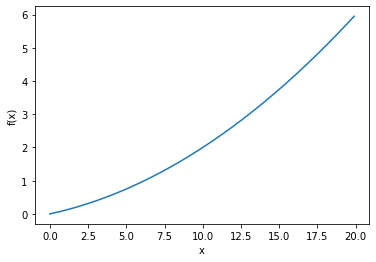

0.2999999999986347

In [6]:
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만듦
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

numerical_diff(function_1, 5)  # 0.1999999999990898
numerical_diff(function_1, 10) # 0.2999999999986347

#### 4.3.3 편미분

- $f(x_0, x_1) = x_0^2 + x_1^2$ 라는 식을 파이썬으로 구현하면 아래와 같음
- 이 식을 미분하려고 할때, 주의해야 하는 것은 변수가 2개이므로, 어느 변수에 대한 미분인지가 중요
- 이처럼 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 정의
- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구하는 것
- 단, 여러 변수들 중에서 목표 변수 하나에 초점을 맞추고, 다른 변수는 값을 고정함

In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

### 4.4 기울기 (Gradient)

- 모든 변수의 편미분을 벡터로 정리한 것
- 아래 그림은 $x_0^2 + x_1^2$의 기울기를 나타내는 그림
- 아래 그림에서 확인할 수 있듯, 기울기는 함수의 **가장 낮은 장소 (최솟값)**를 가리키는 것 같은 모양
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐
- 하지만 정확하게 말한다면, 기울기는 각 지점에서 낮아지는 방향을 가리킴
    - 즉, 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
    - Global Optima, Local Optima 개념 참고

<br/>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbADIrW%2Fbtra6IQukSn%2Fu5FHuUcArKf3FKp5V6skik%2Fimg.png" width="500" height="500">

<br/>



In [8]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.001
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성
    
    for idx in range(x.size):
        # f(x + h) 계산
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

numerical_gradient(function_2, np.array([3.0, 4.0])) # array([6., 8.])
numerical_gradient(function_2, np.array([0.0, 2.0])) # array([0., 4.])
numerical_gradient(function_2, np.array([3.0, 0.0])) # array([6., 0.])

array([6., 0.])

#### 4.4.1 경사법 (경사 하강법)

- 기계학습에서는 학습 단계에서 최적의 매개변수 (가중치와 편향)를 학습에서 찾음
- 최적이라는 것은 손실함수가 최솟값이 될 때의 매개변수 값
- 하지만 손실함수는 복잡하기 때문에, 어디가 최솟값인지 찾기 힘듦
- 따라서 기울기를 잘 이용하여 함수의 (가능한 최대한 작은) 최솟값을 찾으려는 것이 **경사법**의 개념
- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 **기울기**
    - 하지만 기울기가 가리키는 곳에 함수의 최솟값이 있는지 보장할 수는 없음
    - 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없을 수도 있음
- 그렇기 때문에 기울기 정보를 단서로 하여 나아갈 방향을 정하는 경사법 개념이 도입
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한 후, 이동한 곳에서 기울기를 구하고, 이 과정을 반복
- 이렇게 함수의 값을 점차 줄이는 것이 **경사법 (Gradient method)**이고, 기계학습을 최적화 하는데 사용
    - 경사법에서 최솟값을 찾는 과정을 **경사 하강법 (Gradient descent method)**
    - 경사법에서 최댓값을 찾는 과정을 **경사 상승법 (Gradient ascent method)**
    
<br/>

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

<br/>

- 경사법을 수식으로 표현하면 위와 같음
- $\eta$는 갱신하는 양을 나타내고, 신경망 학습에서는 **학습률 (Learning rate)**이라고 정의
- 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하는지를 정하는 것
- 일반적으로 학습률은 0.01, 0.001 등의 값으로 정하는데, 이 값이 너무 크거나 작으면 좋은 장소로 찾아가기 힘듦
- 학습률과 같은 매개변수를 **하이퍼파라미터 (Hyper parameter)**라고 정의
    - 신경망의 가중치 매개변수는 훈련 데이터와 알고리즘으로 자동으로 획득되는 매개변수
    - 하지만 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수

In [9]:
# f = 최적화 하려는 함수, init_x = 초깃값, lr = 학습률, step_num = 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# 학습률에 따른 경사하강법의 결과
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)   # array([-6.11110793e-10,  8.14814391e-10])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)  # array([2.34235971e+12, -3.96091057e+12])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) # array([-2.99999994,  3.99999992])

array([ 2.34235971e+12, -3.96091057e+12])

#### 4.4.2 신경망에서의 기울기

- 기울기는 가중치 매개변수에 대한 손실 함수의 기울기

In [10]:
import sys, os
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet: # x = 입력 데이터, t = 정답 레이블
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net = simpleNet()
print(net.W)             # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)                 # [1.25184467 0.34731474 1.30469603]
np.argmax(p)             # 최댓값의 인덱스 = 2

t = np.array([0, 0, 1])  # 정답 레이블
net.loss(x, t)           # 2.125447431676497 

[[-0.46797384 -0.50796296 -0.11428422]
 [-0.83416617  0.39684863  1.41249757]]
[-1.03153386  0.05238599  1.20267728]


0.3532035647660964

In [11]:
def f(W):
    return net.loss(x, t)

f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04512853  0.13341099 -0.17853952]
 [ 0.0676928   0.20011649 -0.26780928]]


### 4.5 학습 알고리즘 구현하기

- 전제: 신경망에는 적용 가능한 가중치와 편향이 있음. 이 값들을 훈련 데이터에 적응하도록 조정하는 것을 학습이라고 정의
- 1단계: 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져오기
    - 선별한 데이터를 미니배치라고 하고, 그 미니배치의 손실함수 값을 줄이는 것이 목표
- 2단계: 기울기 산출
    - 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기 구하기
    - 기울기는 손실함수의 값을 가장 작게 하는 방향 제시
- 3단계: 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- 4단계: 1~3단계를 반복

<br/>

- 이 과정이 신경망 학습이 이뤄지는 순서. 경사하강법으로 매개변수를 갱신하는 방법
- 이때 데이터를 미니배치로 무작위로 선정하므로, **확률적 경사 하강법 (Stochastic gradient descent, SGD)**로 정의

#### 4.5.1 2층 신경망 클래스 구현하기

In [12]:
import sys, os
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(x, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t): 
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads.params['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads.params['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads.params['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads.params['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100, )
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10, )

(10,)

#### 4.5.2 미니배치 학습 구현하기

- 미니배치 학습이란, 훈련 데이터 중 일부를 무작위로 꺼내고 (미니배치), 그 미니배치에 대해 경사법으로 매개변수를 갱신
- 아래 예시에서는 미니배치 크기를 100으로 설정
- 즉, 60,000개의 훈련 데이터에서 임의로 100개 데이터를 추리고, 이 데이터로 확률적 경사하강법을 수행해 매개변수를 갱신
- 갱신 횟수 (반복 횟수)는 10,000번으로 설정하고, 갱신 할때마다 계산되는 손실 함수 값을 배열에 추가
- 결과를 보면, 학습 횟수가 늘어날수록 손실 함수의 값이 줄어드는 것을 알 수 있음
- 이 결과는 신경망의 가중치 매개변수가 서서히 데이터에 적응하면서 학습되고 있다는 것을 뜻함

In [13]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

#### 4.5.3 시험 데이터로 평가하기

- 앞서 훈련된 모델은 훈련 데이터에 대한 결과이므로, 다른 데이터셋에서도 동작하는지 확인이 필요함
- 즉, 훈련 데이터에서만 학습한 결과인 오버피팅 되었는지를 확인해봐야 함
- 신경망 학습의 목표는 범용적인 능력을 익히는 것 즉, 일반화라고 할 수 있음

In [14]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc: " + str(train_acc) + ', ' + str(test_acc))

### 4.6 정리

- 손실함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수를 찾아내는 것이 신경망 학습의 목표
- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치 값을 갱신하는 작업 반복